#   Prediction of heart disease using knn

    
    

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
missing_values=df.isna().sum().sort_values(ascending=False)

In [6]:
missing_values

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
missing_values_percent=(df.isna().sum()/df.isna().count()).sort_values(ascending=False)

In [8]:
missing_values_percent

age                    0.0
sex                    0.0
chest pain type        0.0
resting bp s           0.0
cholesterol            0.0
fasting blood sugar    0.0
resting ecg            0.0
max heart rate         0.0
exercise angina        0.0
oldpeak                0.0
ST slope               0.0
target                 0.0
dtype: float64

In [9]:
missing_data=pd.concat([missing_values,missing_values_percent],axis=1,keys=["missing_values","missing_values_percent"])

missing_data

In [10]:
missing_data

,missing_values,missing_values_percent
age,0,0.0
sex,0,0.0
chest pain type,0,0.0
resting bp s,0,0.0
cholesterol,0,0.0
fasting blood sugar,0,0.0
resting ecg,0,0.0
max heart rate,0,0.0
exercise angina,0,0.0
oldpeak,0,0.0


In [11]:
df.describe(include=[np.number])

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [12]:

df['chest pain type'] = df['chest pain type'].replace({1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain',4:'asymptomatic'})
df.head()



,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,atypical angina,140,289,0,0,172,0,0.0,1,0
1,49,0,non-anginal pain,160,180,0,0,156,0,1.0,2,1
2,37,1,atypical angina,130,283,0,1,98,0,0.0,1,0
3,48,0,asymptomatic,138,214,0,0,108,1,1.5,2,1
4,54,1,non-anginal pain,150,195,0,0,122,0,0.0,1,0


In [16]:
df.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','maximum_heart_rate','exercise_induced_angina','st_depression','st_slope','target']

In [17]:
df.describe(include=[np.number])

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [26]:
df['chest_pain_type'][df['chest_pain_type']==1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type']==2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type']==3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type']==4] = 'asymptomatic'

df['rest_ecg'][df['rest_ecg']==0] = 'normal'
df['rest_ecg'][df['rest_ecg']==1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg']==2] = 'left ventricular hypertrophy'

df['st_slope'][df['st_slope']==1] = 'opaloping'
df['st_slope'][df['st_slope']==2] = 'flat'
df['st_slope'][df['st_slope']==3] = 'downsloping'



df['sex']=df.sex.apply(lambda x:'male' if x==1 else 'female')

C:\Users\User\AppData\Local\Temp\ipykernel_8260\3046564130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type']==1] = 'typical angina'
C:\Users\User\AppData\Local\Temp\ipykernel_8260\3046564130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type']==2] = 'atypical angina'
C:\Users\User\AppData\Local\Temp\ipykernel_8260\3046564130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [22]:
df['chest_pain_type'].value_counts()

chest_pain_type
asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: count, dtype: int64

In [23]:
df['rest_ecg'].value_counts()

rest_ecg
normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: count, dtype: int64

In [27]:
df['st_slope'].value_counts()

st_slope
flat           582
opaloping      526
downsloping     81
0                1
Name: count, dtype: int64

In [29]:
df.drop(df[df.st_slope==0].index,inplace=True)

In [30]:
df['st_slope'].value_counts()

st_slope
flat           582
opaloping      526
downsloping     81
Name: count, dtype: int64

In [31]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,female,atypical angina,140,289,0,normal,172,0,0.0,opaloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,female,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,opaloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,female,non-anginal pain,150,195,0,normal,122,0,0.0,opaloping,0


In [32]:
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
maximum_heart_rate         0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [34]:
df.shape

(1189, 12)

In [35]:
df.describe(include=[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


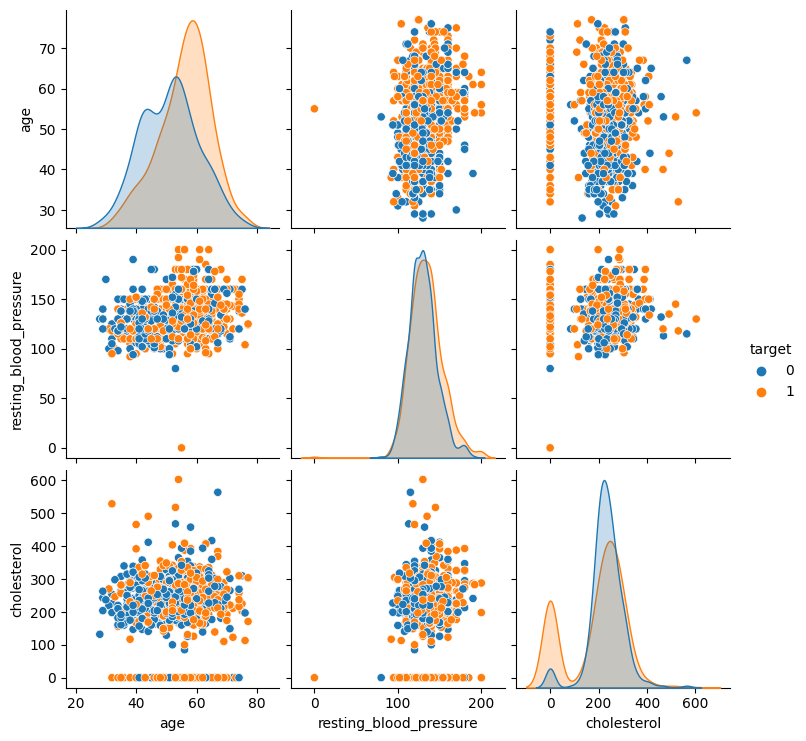

In [37]:
sns.pairplot(df,hue='target',vars=['age','resting_blood_pressure','cholesterol'])

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

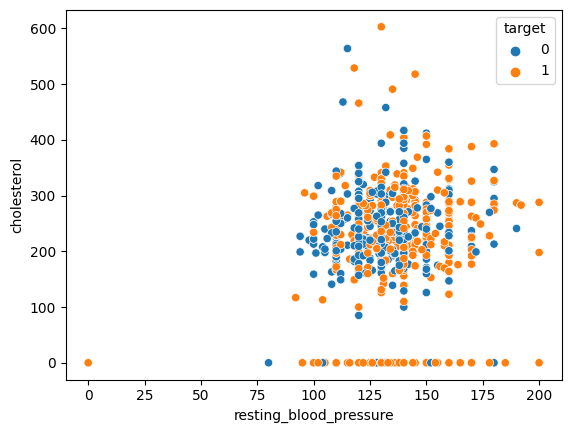

In [38]:
sns.scatterplot(x='resting_blood_pressure',y='cholesterol',hue='target',data=df)

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

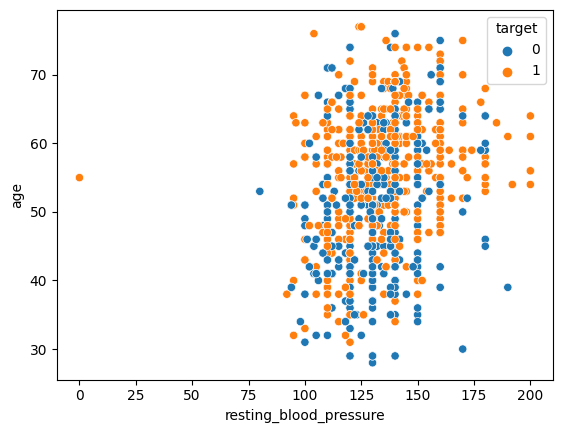

In [39]:
sns.scatterplot(x='resting_blood_pressure',y='age',hue='target',data=df)

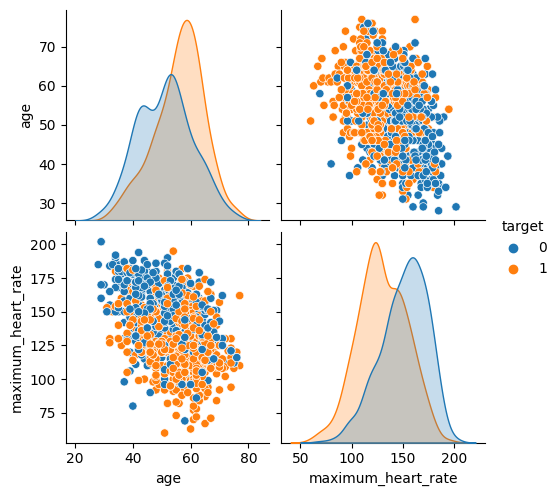

In [42]:
sns.pairplot(df,hue='target',vars=['age','maximum_heart_rate',])

<Axes: xlabel='age', ylabel='maximum_heart_rate'>

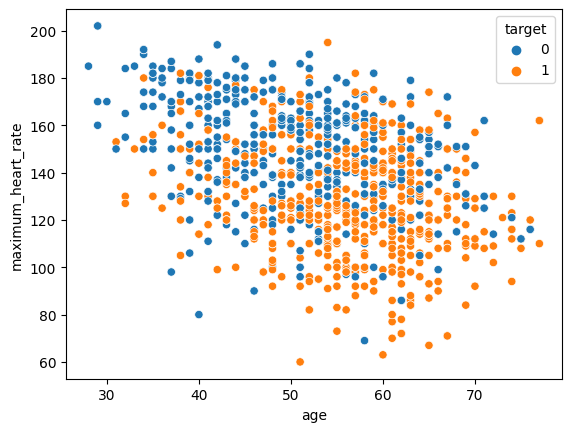

In [44]:
sns.scatterplot(x='age',y='maximum_heart_rate',hue='target',data=df)

In [50]:
df_numeric=df[['age','resting_blood_pressure','cholesterol','maximum_heart_rate']]

In [51]:
df_numeric.head()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [52]:
#zscore for numeric values in the dataset
z= np.abs(stats.zscore(df_numeric))

In [53]:
print(z)

           age  resting_blood_pressure  cholesterol  maximum_heart_rate
0     1.466266                0.428136     0.775228            1.264301
1     0.503599                1.517370     0.299516            0.637259
2     1.787155                0.116481     0.716067            1.635766
3     0.610562                0.319212     0.035725            1.243865
4     0.031216                0.972753     0.151616            0.695204
...        ...                     ...          ...                 ...
1185  0.931451                1.205715     0.528727            0.303303
1186  1.528698                0.645983     0.171336            0.049408
1187  0.352105                0.116481     0.782658            0.969535
1188  0.352105                0.116481     0.252646            1.342681
1189  1.680192                0.319212     0.348816            1.303491

[1189 rows x 4 columns]


In [54]:
#defining threshold for filtering outliers
threshold=3
print(np.where(z>3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


In [55]:
#filtering outliers retaining only those data points which are below threshold
df=df[(z<3).all(axis=1)]

In [56]:
df.shape


(1172, 12)

In [57]:
#encoding categorical variables
df=pd.get_dummies(df,drop_first=True)

In [58]:
df.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,st_depression,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_opaloping
0,40,140,289,0,172,0,0.0,0,True,False,False,False,True,False,True
1,49,160,180,0,156,0,1.0,1,False,True,False,False,True,True,False
2,37,130,283,0,98,0,0.0,0,True,False,False,False,False,False,True
3,48,138,214,0,108,1,1.5,1,False,False,False,False,True,True,False
4,54,150,195,0,122,0,0.0,0,False,True,False,False,True,False,True


In [59]:
df.shape

(1172, 15)

In [60]:
#segregating the dataset into features i.e, x and target variables i.e, y
x=df.drop(['target'],axis=1)
y=df['target']

<Axes: title={'center': 'correlation with CVD'}>

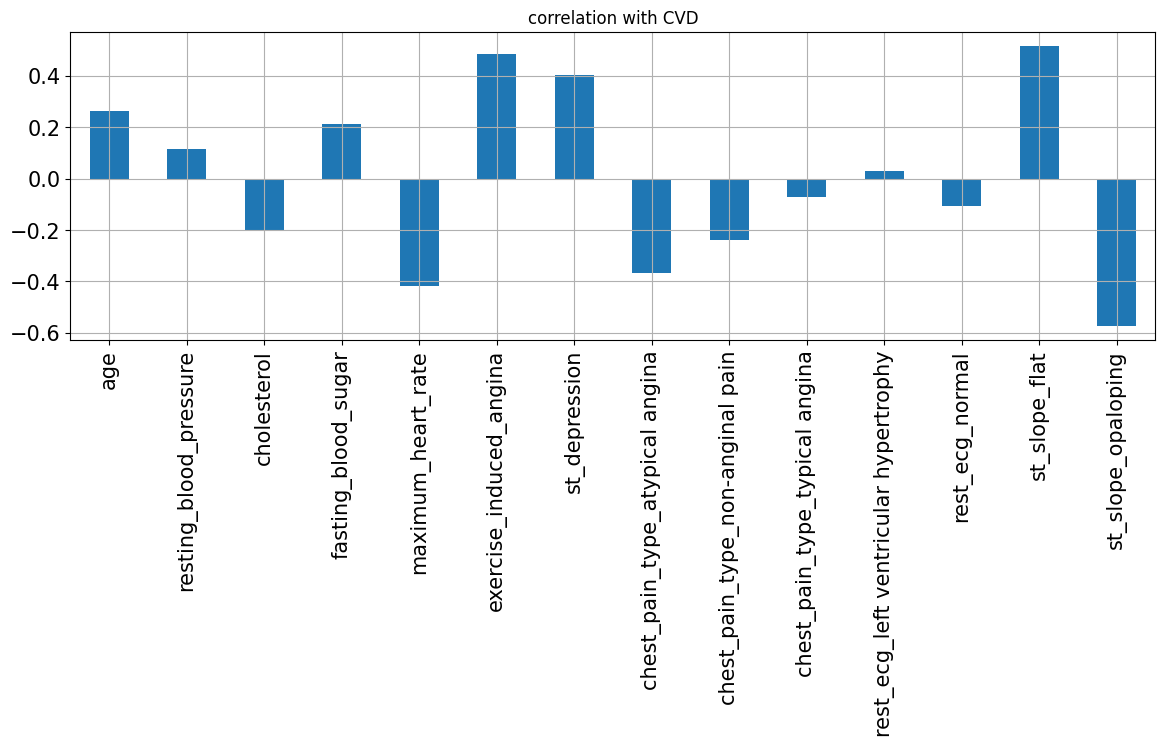

In [61]:
#correlation with response variable class

x.corrwith(y).plot.bar(
   figsize=(14,4),title='correlation with CVD',fontsize=15,rot=90,grid=True
)


In [74]:
#train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,shuffle=True,random_state=None)

In [75]:
#distribution of target variables

print('Distribution of target variables is training set')
print(Y_train.value_counts())

print('Distribution of target variables is test set')
print(y_test.value_counts())

Distribution of target variables is training set
target
1    491
0    446
Name: count, dtype: int64
Distribution of target variables is test set
target
1    123
0    112
Name: count, dtype: int64


In [76]:
print(X_train.shape)

(937, 14)


In [77]:
print(Y_train.shape)

(937,)


In [78]:
print(x_test.shape)

(235, 14)


In [79]:
print(y_test.shape)

(235,)


In [80]:
#normalize the numeric features in the range of 0 & 1

from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','maximum_heart_rate','st_depression']]=scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','maximum_heart_rate','st_depression']])

In [81]:
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,st_depression,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_opaloping
86,0.755102,0.90,0.535642,1,0.323308,1,0.522727,False,False,False,False,True,True,False
550,0.816327,0.59,0.368635,1,0.496241,0,0.318182,False,False,True,False,False,False,True
1028,0.632653,0.90,0.586558,0,0.676692,0,0.318182,False,False,True,True,False,True,False
1014,0.530612,0.30,0.486762,0,0.428571,1,0.613636,False,False,False,False,True,True,False
849,0.346939,0.35,0.529532,0,0.872180,0,0.295455,False,False,False,True,False,False,True


In [82]:
x_test[['age','resting_blood_pressure','cholesterol','maximum_heart_rate','st_depression']]=scaler.fit_transform(x_test[['age','resting_blood_pressure','cholesterol','maximum_heart_rate','st_depression']])

In [83]:
x_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,st_depression,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_opaloping
673,0.627907,0.483516,0.398082,0,0.456693,1,0.933333,False,False,False,True,False,True,False
902,0.534884,0.615385,0.402878,0,0.842520,0,0.600000,False,True,False,False,True,False,True
947,0.395349,0.395604,0.731415,0,0.590551,1,0.533333,False,False,False,False,True,True,False
919,0.697674,0.505495,0.803357,0,0.716535,0,0.333333,False,True,False,False,True,False,True
386,0.627907,0.615385,0.000000,0,0.299213,1,0.333333,False,False,False,False,True,True,False


In [85]:
#initialise knn model
k=5
knn_classifier=KNeighborsClassifier(n_neighbors=k)

In [88]:
knn_classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [90]:
#making predictions
y_pred=knn_classifier.predict(x_test)

In [91]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [97]:
#evaluation
from sklearn.metrics import confusion_matrix
cn_knn=confusion_matrix(y_test,y_pred)

In [98]:
cn_knn

array([[ 88,  24],
       [ 18, 105]], dtype=int64)

<Axes: >

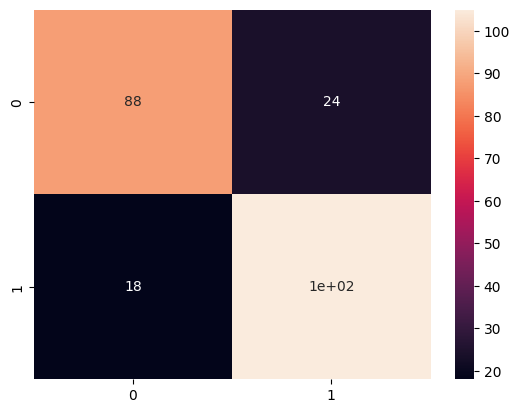

In [99]:
sns.heatmap(cn_knn,annot=True)

In [102]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [110]:
prec=precision_score(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [107]:
prec


0.813953488372093

In [108]:
f1

0.8333333333333333

In [109]:
rec

0.8536585365853658

In [111]:
acc

0.8212765957446808

In [112]:
knn_result=accuracy_score(y_test,y_pred)

In [113]:
knn_result

0.8212765957446808